# **Laboratorio N°5: Número de Condición**


In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)$

In [4]:
A = np.array([[1,0],[0,1]])
B = np.array([[-1,0],[0,-1]])
A_cond = np.linalg.cond(A)
B_cond = np.linalg.cond(B)
print('cond(A) + cond(B) es igual a: ' + str(A_cond + B_cond))

C = A+B
print("cond(A+B) es igual a " + str(np.linalg.cond(C)))

cond(A) + cond(B) es igual a: 2.0
cond(A+B) es igual a inf


**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

In [5]:
A = np.array([[1,0],[0,1]])
B = np.array([[-1,0],[0,-1]])
A_cond = np.linalg.cond(A, 1)
B_cond = np.linalg.cond(B, 1)
print('cond(A) - cond(B) es igual a: ' + str(A_cond - B_cond))

C = A-B
print("cond(A-B) es igual a " + str(np.linalg.cond(C)))

cond(A) - cond(B) es igual a: 0.0
cond(A-B) es igual a 1.0


**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

In [6]:
A = np.array([[1,0],[0,1]])
B = np.array([[-1,0],[1,-1]])
A_cond = np.linalg.cond(A)
B_cond = np.linalg.cond(B)
print('cond(A) * cond(B) es igual a: ' + str(A_cond * B_cond))

C = A*B
print("cond(A*B) es igual a " + str(np.linalg.cond(C)))

cond(A) * cond(B) es igual a: 2.618033988749895
cond(A*B) es igual a 1.0


## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array.




In [7]:
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

def matriz_A(n):
  A = np.eye(n, k=0)/n + np.eye(n, k=n-1)*n*n + np.eye(n, k=-n+1)
  return A

def matriz_H(n):
  matrix = np.zeros((n,n))
  for i in range(1,2*n): 
    matrix += np.eye(n, k=-n+i)/i
  return np.flip(matrix, 0)

print(matriz_H(4))


[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

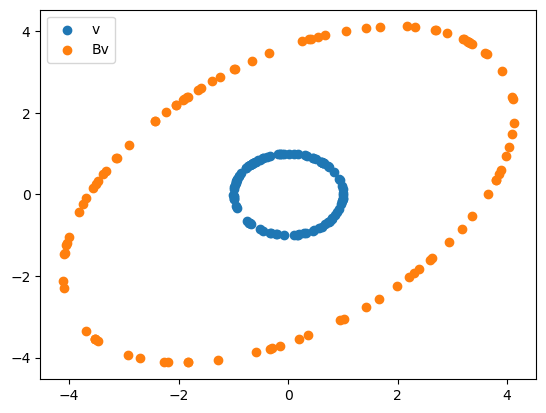

In [8]:
#Aca vector unitario de norma 2 es vector que norma 2 es 1
B = matriz_B(2)
V = np.random.rand(2, 100) - 0.5
V = V / np.linalg.norm(V, axis=0)
#Dividis cada elementod de V por su norma y como busco que tenga norma 1 ya con esto me alcanza para normalizar
BV = B @ V

plt.scatter(V[0], V[1], label = "v")
plt.scatter(BV[0], BV[1], label = "Bv")
plt.legend()


**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [20]:
def vector_condicion(M, N):
  V = np.zeros(N)
  for i in range(N):
    V[i] = np.linalg.norm(M[:,i],axis=0)
  return V
print(vector_condicion(matriz_A(3), 3))

[1.05409255 0.33333333 9.00617072]


**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


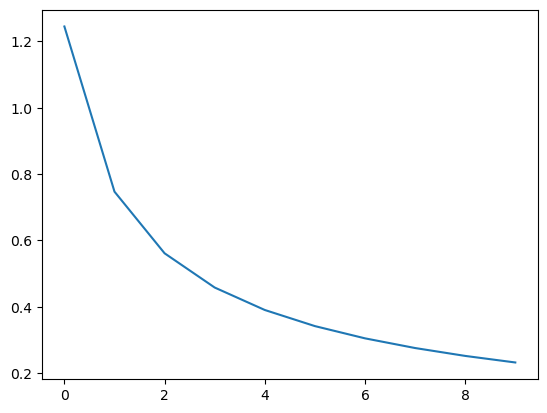

In [30]:
A = matriz_H(10)
x = np.arange(10)  
y = vector_condicion(A, 10)

plt.plot(x, y)
plt.show()

In [6]:
import numpy as np

def elim_gaussiana(A):
    cant_op = 0
    m=A.shape[0]
    n=A.shape[1]
    Ac = A.copy()
    
    if m!=n:
        print('Matriz no cuadrada')
        return
    
    ## desde aqui -- CODIGO A COMPLETAR
    for i in range(n - 1):
        for f in range(i + 1, n):
            divisor = Ac[f][i] / Ac[i][i]
            Ac[f][i] = divisor  
            for c in range(i+1,n):  
                Ac[f][c] = Ac[f][c] - divisor * Ac[i][c]
                cant_op+=2
    ## hasta aqui

    print(Ac)
            
    L = np.tril(Ac,-1) + np.eye(A.shape[0]) 
    U = np.triu(Ac)
    
    return L, U, cant_op


def main():
    n = 7
    B = np.array([[2,1 ,2 ,3],[4 ,3 ,3 ,4], [-2, 2 ,-4, -12],[4 ,1 ,8 ,-3]])
    print('Matriz B \n', B)
    
    L,U,cant_oper = elim_gaussiana(B)

    
    print('Matriz L \n', L)
    print('Matriz U \n', U)
    print('Cantidad de operaciones: ', cant_oper)
    print('B=LU? ' , 'Si!' if np.allclose(np.linalg.norm(B - L@U, 1), 0) else 'No!')
    print('Norma infinito de U: ', np.max(np.sum(np.abs(U), axis=1)) )

if __name__ == "__main__":
    main()
    
    

Matriz B 
 [[  2   1   2   3]
 [  4   3   3   4]
 [ -2   2  -4 -12]
 [  4   1   8  -3]]
[[ 2  1  2  3]
 [ 2  1 -1 -2]
 [-1  3  1 -3]
 [ 2 -1  3 -2]]
Matriz L 
 [[ 1.  0.  0.  0.]
 [ 2.  1.  0.  0.]
 [-1.  3.  1.  0.]
 [ 2. -1.  3.  1.]]
Matriz U 
 [[ 2  1  2  3]
 [ 0  1 -1 -2]
 [ 0  0  1 -3]
 [ 0  0  0 -2]]
Cantidad de operaciones:  28
B=LU?  Si!
Norma infinito de U:  8


**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (d) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

In [ ]:
def 

## Ejercicio 3 (Ej 20 - Práctica 2)

Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [ ]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 5/4]])

(a) Calcular $Cond_\infty(A)$.


In [40]:
print(np.linalg.cond(A, np.inf))


6.0


(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)?



In [41]:
error = (10**(-4)) / (6 * np.sqrt(17))

(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.

In [42]:
x = np.array([1, 1, 1])  
b = np.array([3, 2, 2])  
inf_cond_A = np.linalg.cond(A, np.inf)

rand_vector = np.random.randn(3)  
rand_vector = (rand_vector/np.linalg.norm(rand_vector)) * error 

delta_b = (10**(-4)) / inf_cond_A * rand_vector

perturbed_b = b + delta_b  

x_tilde = np.linalg.solve(A, perturbed_b)

error = np.linalg.norm(x_tilde - x)

print(error)

8.15530879789327e-11
